Importamos los paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

(0.0, 256.0)

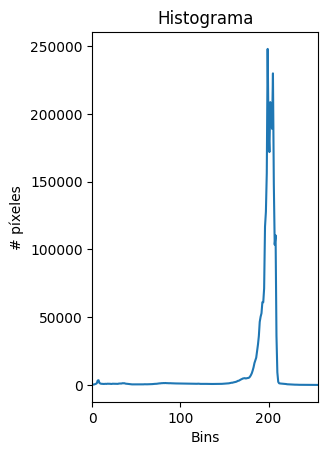

In [28]:
#Carga imagen ejemplo con monedas
img = cv2.imread('Monedas.jpg') 

#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

Text(0.5, 1.0, 'OTSU invertida')

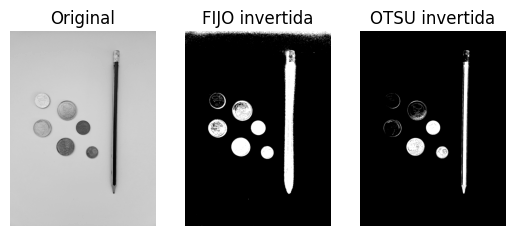

In [29]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 185
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Numero de monedas encontradas:
6


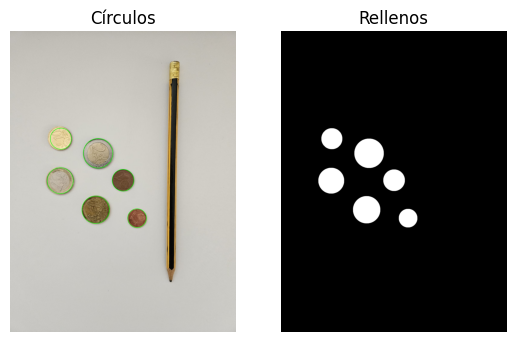

In [30]:
#Carga imagen ejemplo con monedas
img = cv2.imread('Monedas.jpg') 

#Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

print("Numero de monedas encontradas:")
print(len(circ[0]))

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


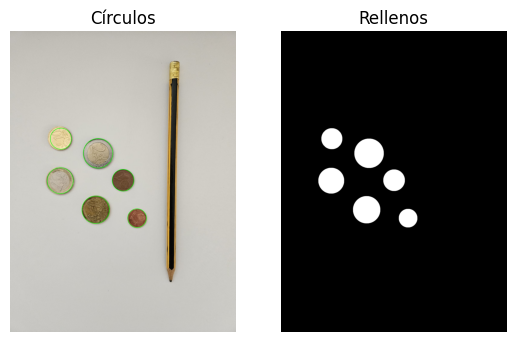

Hay 6 monedas en la imagen
[333.5 994.5  86.5]
10 céntimos
50 céntimos
2 euros
1 céntimo
1 euro
2 céntimos
Hay 3.63 € en la imagen


In [31]:
# Variable global para mantener un seguimiento del círculo seleccionado
selected_circle = None

# Función para manejar eventos de ratón
def on_mouse(event, x, y, flags, params):
    global selected_circle
    if event == cv2.EVENT_LBUTTONDOWN:
        # Calcula la distancia del clic de ratón a cada círculo y selecciona el más cercano
        min_distance = float('inf')
        for det in circ[0]:
            x_coor, y_coor, det_radio = det
            distance = np.sqrt((x - x_coor) ** 2 + (y - y_coor) ** 2)
            if distance < min_distance:
                min_distance = distance
                selected_circle = det
        if selected_circle is not None:
            cv2.destroyAllWindows()

#Carga imagen ejemplo con monedas
img = cv2.imread('Monedas.jpg') 

#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


pimg = cv2.medianBlur(img_gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

print("Hay", len(circ[0]), "monedas en la imagen")

# Crea una ventana para la imagen
cv2.namedWindow('Imagen con Círculos', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Imagen con Círculos', 600, 600)
selected_circle = cv2.setMouseCallback('Imagen con Círculos', on_mouse)

# Muestra la imagen con círculos
cv2.imshow('Imagen con Círculos', img_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()

print(selected_circle)

suma = 0
tolerancia = 2.5  # Ajusta la tolerancia según tus necesidades
radio_seleccionado = selected_circle[2]

for det in circ[0]:
     x_coor, y_coor, det_radio = det
     if abs(det_radio - (8.13 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.01
          print("1 céntimo")
     elif abs(det_radio - (9.375 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.02
          print("2 céntimos")
     elif abs(det_radio - (10.625 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.05
          print("5 céntimos")
     elif abs(det_radio - (9.875 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.1
          print("10 céntimos")
     elif abs(det_radio - (11.125 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.2
          print("20 céntimos")
     elif abs(det_radio - (12.125 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.5
          print("50 céntimos")
     elif abs(det_radio - radio_seleccionado) <= tolerancia:
          suma += 1
          print("1 euro")
     elif abs(det_radio - (12.875 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 2
          print("2 euros")

print("Hay", round(suma, 2), "€ en la imagen")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


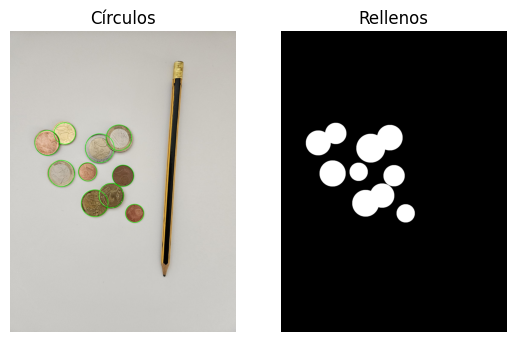

Hay 10 monedas en la imagen
[342.5 946.5  87.6]
50 céntimos
1 céntimo
20 céntimos
5 céntimos
1 céntimo
2 céntimos
20 céntimos
1 euro
2 euros
2 céntimos
Hay 4.01 € en la imagen


In [32]:
# Variable global para mantener un seguimiento del círculo seleccionado
selected_circle = None

# Función para manejar eventos de ratón
def on_mouse(event, x, y, flags, params):
    global selected_circle
    if event == cv2.EVENT_LBUTTONDOWN:
        # Calcula la distancia del clic de ratón a cada círculo y selecciona el más cercano
        min_distance = float('inf')
        for det in circ[0]:
            x_coor, y_coor, det_radio = det
            distance = np.sqrt((x - x_coor) ** 2 + (y - y_coor) ** 2)
            if distance < min_distance:
                min_distance = distance
                selected_circle = det
        if selected_circle is not None:
            cv2.destroyAllWindows()

#Carga imagen ejemplo con monedas
img = cv2.imread('Monedas2.jpg') 

#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


pimg = cv2.medianBlur(img_gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

print("Hay", len(circ[0]), "monedas en la imagen")

# Crea una ventana para la imagen
cv2.namedWindow('Imagen con Círculos', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Imagen con Círculos', 600, 600)
selected_circle = cv2.setMouseCallback('Imagen con Círculos', on_mouse)

# Muestra la imagen con círculos
cv2.imshow('Imagen con Círculos', img_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()

print(selected_circle)

suma = 0
tolerancia = 2.5 # Ajusta la tolerancia según tus necesidades
radio_seleccionado = selected_circle[2]

for det in circ[0]:
     x_coor, y_coor, det_radio = det
     if abs(det_radio - (8.13 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.01
          print("1 céntimo")
     elif abs(det_radio - (9.375 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.02
          print("2 céntimos")
     elif abs(det_radio - (10.625 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.05
          print("5 céntimos")
     elif abs(det_radio - (9.875 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.1
          print("10 céntimos")
     elif abs(det_radio - (11.125 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.2
          print("20 céntimos")
     elif abs(det_radio - (12.125 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.5
          print("50 céntimos")
     elif abs(det_radio - radio_seleccionado) <= tolerancia:
          suma += 1
          print("1 euro")
     elif abs(det_radio - (12.875 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 2
          print("2 euros")

print("Hay", round(suma, 2), "€ en la imagen")

Al ejecutar el código anterior, podemos observar como si clickamos en la moneda de 1€ que aparece sin solape obtenemos un resultado de 4.01€, no es un resultado correcto ya que, no se han contado una moneda de 1€ y una moneda de 10 céntimos, estas se han cambiado por una moneda de 20 céntimos y una moneda de 2 céntimos, lo que nos da la diferencia que se produce respecto al resultado esperado, (1.10 - 0.22 = 0.88). El resultado esperado era 4.89€. También se puede observar, que dichas monedas de 1€ y 10 céntimos no contadas presentaban solape con otras, el error podría estar provocado por dicho solape que no permite obtener los radios con la misma precisión que sino lo hubiera. Finalmente, observamos que el número de monedas si se cuenta correctamente. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


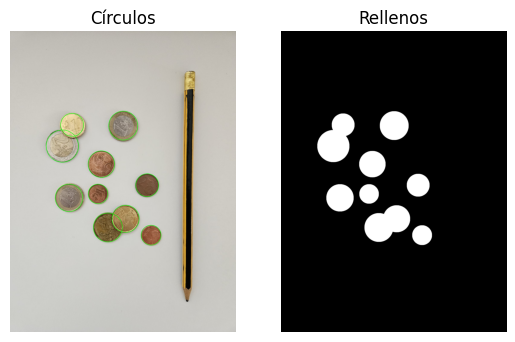

Hay 10 monedas en la imagen
[751.5 628.5  96.4]
5 céntimos
1 euro
2 euros
1 euro
1 céntimo
5 céntimos
1 céntimo
20 céntimos
2 céntimos
2 céntimos
Hay 4.36 € en la imagen


In [33]:
# Variable global para mantener un seguimiento del círculo seleccionado
selected_circle = None

# Función para manejar eventos de ratón
def on_mouse(event, x, y, flags, params):
    global selected_circle
    if event == cv2.EVENT_LBUTTONDOWN:
        # Calcula la distancia del clic de ratón a cada círculo y selecciona el más cercano
        min_distance = float('inf')
        for det in circ[0]:
            x_coor, y_coor, det_radio = det
            distance = np.sqrt((x - x_coor) ** 2 + (y - y_coor) ** 2)
            if distance < min_distance:
                min_distance = distance
                selected_circle = det
        if selected_circle is not None:
            cv2.destroyAllWindows()

#Carga imagen ejemplo con monedas
img = cv2.imread('Monedas3.jpg') 

#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


pimg = cv2.medianBlur(img_gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

print("Hay", len(circ[0]), "monedas en la imagen")

# Crea una ventana para la imagen
cv2.namedWindow('Imagen con Círculos', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Imagen con Círculos', 600, 600)
selected_circle = cv2.setMouseCallback('Imagen con Círculos', on_mouse)

# Muestra la imagen con círculos
cv2.imshow('Imagen con Círculos', img_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()

print(selected_circle)

suma = 0
tolerancia = 2.5 # Ajusta la tolerancia según tus necesidades
radio_seleccionado = selected_circle[2]

for det in circ[0]:
     x_coor, y_coor, det_radio = det
     if abs(det_radio - (8.13 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.01
          print("1 céntimo")
     elif abs(det_radio - (9.375 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.02
          print("2 céntimos")
     elif abs(det_radio - (10.625 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.05
          print("5 céntimos")
     elif abs(det_radio - (9.875 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.1
          print("10 céntimos")
     elif abs(det_radio - (11.125 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.2
          print("20 céntimos")
     elif abs(det_radio - (12.125 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.5
          print("50 céntimos")
     elif abs(det_radio - radio_seleccionado) <= tolerancia:
          suma += 1
          print("1 euro")
     elif abs(det_radio - (12.875 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 2
          print("2 euros")

print("Hay", round(suma, 2), "€ en la imagen")

En este caso, como en el anterior, el número de monedas se obtiene correctamente a pesar del solape. No obstante, volvemos a tener errores a la hora de contar el valor total. En esta ocasión, si clicamos en la moneda que se encuentra más arriba en la imagen, se han dejado de contar la moneda de 50 céntimos y la moneda de 10 céntimos, sustituyéndose en el cálculo por una moneda de 5 céntimos y una moneda de 2 céntimos (60 - 7 = 53 justo la diferencia que hay con el resultado esperado). Nuevamente volvemos a observar que las monedas confundidas presentan solape con otras, lo que podría confirmar la hipótesis presentada anteriormente.  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


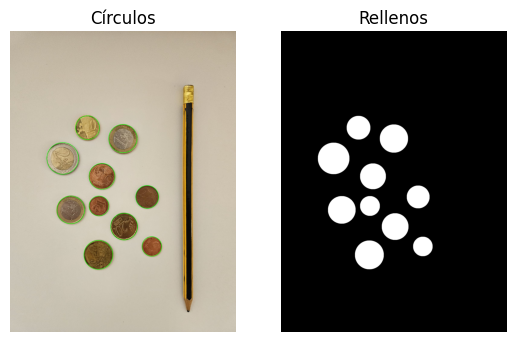

Hay 10 monedas en la imagen
[749.5 714.5  94.2]
2 céntimos
50 céntimos
2 euros
1 euro
20 céntimos
5 céntimos
1 céntimo
1 céntimo
1 euro
10 céntimos
Hay 4.89 € en la imagen


In [34]:
# Variable global para mantener un seguimiento del círculo seleccionado
selected_circle = None

# Función para manejar eventos de ratón
def on_mouse(event, x, y, flags, params):
    global selected_circle
    if event == cv2.EVENT_LBUTTONDOWN:
        # Calcula la distancia del clic de ratón a cada círculo y selecciona el más cercano
        min_distance = float('inf')
        for det in circ[0]:
            x_coor, y_coor, det_radio = det
            distance = np.sqrt((x - x_coor) ** 2 + (y - y_coor) ** 2)
            if distance < min_distance:
                min_distance = distance
                selected_circle = det
        if selected_circle is not None:
            cv2.destroyAllWindows()

#Carga imagen ejemplo con monedas
img = cv2.imread('Monedas4.jpg') 

#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


pimg = cv2.medianBlur(img_gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

print("Hay", len(circ[0]), "monedas en la imagen")

# Crea una ventana para la imagen
cv2.namedWindow('Imagen con Círculos', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Imagen con Círculos', 600, 600)
selected_circle = cv2.setMouseCallback('Imagen con Círculos', on_mouse)

# Muestra la imagen con círculos
cv2.imshow('Imagen con Círculos', img_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()

print(selected_circle)

suma = 0
tolerancia = 2.5 # Ajusta la tolerancia según tus necesidades
radio_seleccionado = selected_circle[2]

for det in circ[0]:
     x_coor, y_coor, det_radio = det
     if abs(det_radio - (8.13 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.01
          print("1 céntimo")
     elif abs(det_radio - (9.375 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.02
          print("2 céntimos")
     elif abs(det_radio - (10.625 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.05
          print("5 céntimos")
     elif abs(det_radio - (9.875 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.1
          print("10 céntimos")
     elif abs(det_radio - (11.125 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.2
          print("20 céntimos")
     elif abs(det_radio - (12.125 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 0.5
          print("50 céntimos")
     elif abs(det_radio - radio_seleccionado) <= tolerancia:
          suma += 1
          print("1 euro")
     elif abs(det_radio - (12.875 * radio_seleccionado / 11.625)) <= tolerancia:
          suma += 2
          print("2 euros")

print("Hay", round(suma, 2), "€ en la imagen")

En este último caso, eliminamos el solape entre las monedas y si clickamos sobre la moneda de 1€ que se encuentra más arriba en la imagen podemos observar cómo se llega al valor correcto.

Tarea 3:

Vamos a tratar de extraer toda la información posible de TAR.png:

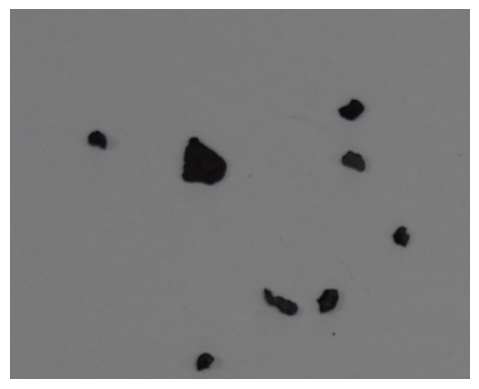

In [35]:
img = cv2.imread('TAR.png') 

#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

(0.0, 256.0)

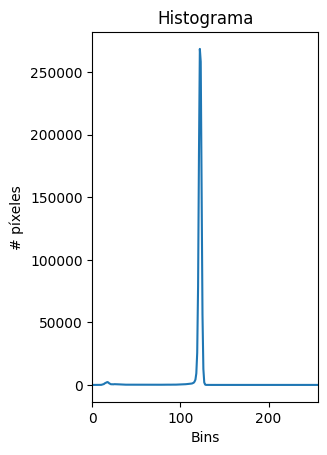

In [36]:
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

Vamos a tratar de extraer toda la información posible de la imagen:

Text(0.5, 1.0, 'OTSU invertida')

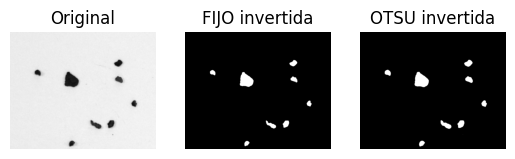

In [37]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 40
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


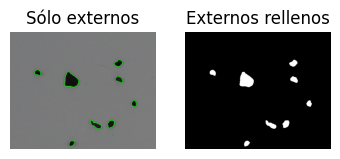

In [38]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th2, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
img_cont = np.zeros(img_rgb.shape)

tar_area = []
tar_perimetro = []
tar_rect = []
tar_elipse = []

# Crea una máscara vacía del mismo tamaño que la imagen original
mask = np.zeros(img_rgb.shape, dtype=np.uint8)

for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)
    if (area > 200):

        cv2.drawContours(mask, [c], -1, (255, 255, 255), thickness=cv2.FILLED)
        
        tar_area.append(area)
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        tar_perimetro.append(perimetro)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        tar_rect.append(rect)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            tar_elipse.append(elipse)
            #Para determinadas tareas nos interesará mostrar estos valores
            #print(area, perimetro, rect, cx,cy,radio, elipse)

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
masked_figure = cv2.bitwise_and(img_rgb, mask)
tar_mean_color = cv2.mean(masked_figure[masked_figure != 0])

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()

Vamos a tratar de extraer toda la información posible de PEL.png:

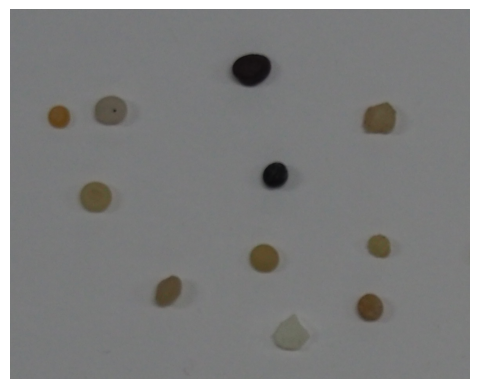

In [39]:
img = cv2.imread('PEL.png') 

#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

(0.0, 256.0)

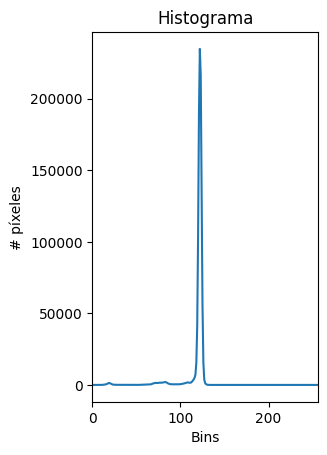

In [40]:
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

Text(0.5, 1.0, 'OTSU invertida')

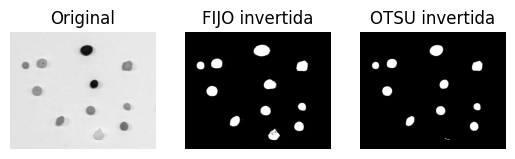

In [41]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 110
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


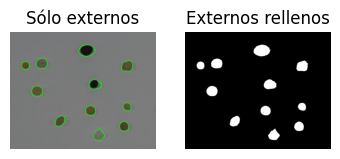

In [42]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
img_cont = np.zeros(img_rgb.shape)

pel_area = []
pel_perimetro = []
pel_rect = []
pel_elipse = []

# Crea una máscara vacía del mismo tamaño que la imagen original
mask = np.zeros(img_rgb.shape, dtype=np.uint8)

for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)
    if (area > 200): 
        
        cv2.drawContours(mask, [c], -1, (255, 255, 255), thickness=cv2.FILLED)

        pel_area.append(area)
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        pel_perimetro.append(perimetro)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        pel_rect.append(rect)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            pel_elipse.append(elipse)
            #Para determinadas tareas nos interesará mostrar estos valores
            #print(area, perimetro, rect, cx,cy,radio, elipse)

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
masked_figure = cv2.bitwise_and(img_rgb, mask)
pel_mean_color = cv2.mean(masked_figure[masked_figure != 0])

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()

Vamos a tratar de extraer toda la información posible de FRA.png:

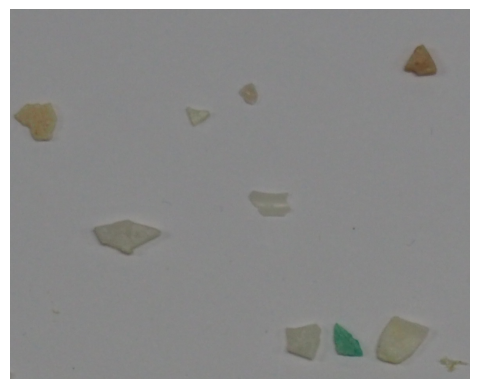

In [43]:
img = cv2.imread('FRA.png') 

#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

(0.0, 256.0)

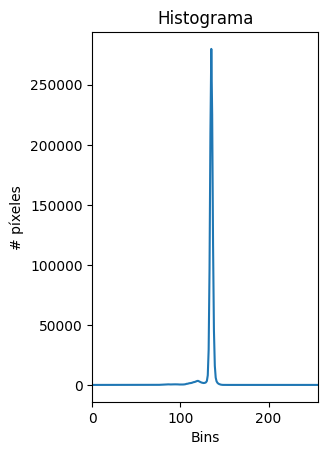

In [44]:
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

Text(0.5, 1.0, 'OTSU invertida')

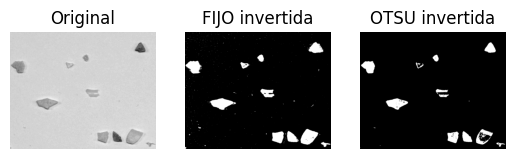

In [45]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 130
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


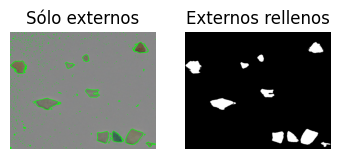

In [46]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
img_cont = np.zeros(img_rgb.shape)

fra_area = []
fra_perimetro = []
fra_rect = []
fra_elipse = []

# Crea una máscara vacía del mismo tamaño que la imagen original
mask = np.zeros(img_rgb.shape, dtype=np.uint8)

for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)
    if (area > 200):

        cv2.drawContours(mask, [c], -1, (255, 255, 255), thickness=cv2.FILLED)

        fra_area.append(area)
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        fra_perimetro.append(perimetro)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        fra_rect.append(rect)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            fra_elipse.append(elipse)
            #Para determinadas tareas nos interesará mostrar estos valores
            #print(area, perimetro, rect, cx,cy,radio, elipse)

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
masked_figure = cv2.bitwise_and(img_rgb, mask)
fra_mean_color = cv2.mean(masked_figure[masked_figure != 0])


plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()

Mostramos los datos recogidos

In [47]:
print("Datos para TAR:")
print("Areas mínima, máxima y media:", min(tar_area), max(tar_area), sum(tar_area) / len(tar_area))
print("Perímetros mínimo, máximo y medio:", min(tar_perimetro), max(tar_perimetro), sum(tar_perimetro) / len(tar_perimetro))
suma_rect = 0
for rect in tar_rect:
    suma_rect += (rect[1][0] * rect[1][1])

print("Media del área del rectángulo mínimo orientado que se ajusta a cada contorno:", suma_rect / len(tar_rect))
print("Porcentaje que ocupa el área del contorno dentro del rectángulo mínimo orientado que se ajusta a dicho contorno:", (sum(tar_area) / len(tar_area)) / (suma_rect / len(tar_rect)))
print("Color medio: ", tar_mean_color)

print("----------------------------------------------------------------------------------------------------------------------------------------------------")

print("Datos para PEL:")
print("Areas mínima, máxima y media:", min(pel_area), max(pel_area), sum(pel_area) / len(pel_area))
print("Perímetros mínimo, máximo y medio:", min(pel_perimetro), max(pel_perimetro), sum(pel_perimetro) / len(pel_perimetro))
suma_rect = 0
for rect in pel_rect:
    suma_rect += (rect[1][0] * rect[1][1])

print("Media del área del rectángulo mínimo orientado que se ajusta a cada contorno:", suma_rect / len(pel_rect))
print("Porcentaje que ocupa el área del contorno dentro del rectángulo mínimo orientado que se ajusta a dicho contorno:", (sum(pel_area) / len(pel_area)) / (suma_rect / len(pel_rect)))
print("Color medio: ", pel_mean_color)

print("----------------------------------------------------------------------------------------------------------------------------------------------------")

print("Datos para FRA:")
print("Areas mínima, máxima y media:", min(fra_area), max(fra_area), sum(fra_area) / len(fra_area))
print("Perímetros mínimo, máximo y medio:", min(fra_perimetro), max(fra_perimetro), sum(fra_perimetro) / len(fra_perimetro))
suma_rect = 0
for rect in fra_rect:
    suma_rect += (rect[1][0] * rect[1][1])

print("Media del área del rectángulo mínimo orientado que se ajusta a cada contorno:", suma_rect / len(fra_rect))
print("Porcentaje que ocupa el área del contorno dentro del rectángulo mínimo orientado que se ajusta a dicho contorno:", (sum(fra_area) / len(fra_area)) / (suma_rect / len(fra_rect)))
print("Color medio: ", fra_mean_color)

print("--------------------------------------------------------------------------------------------------------------------------------------")

Datos para TAR:
Areas mínima, máxima y media: 1442.0 9690.0 2989.4375
Perímetros mínimo, máximo y medio: 150.02438533306122 408.47517585754395 214.69253914058208
Media del área del rectángulo mínimo orientado que se ajusta a cada contorno: 3967.715030461908
Porcentaje que ocupa el área del contorno dentro del rectángulo mínimo orientado que se ajusta a dicho contorno: 0.7534405765153904
Color medio:  (26.894464276056034, 0.0, 0.0, 0.0)
----------------------------------------------------------------------------------------------------------------------------------------------------
Datos para PEL:
Areas mínima, máxima y media: 3035.0 9244.0 5296.136363636364
Perímetros mínimo, máximo y medio: 226.40916073322296 484.90158200263977 324.6969465559179
Media del área del rectángulo mínimo orientado que se ajusta a cada contorno: 7005.4741260719975
Porcentaje que ocupa el área del contorno dentro del rectángulo mínimo orientado que se ajusta a dicho contorno: 0.75599970370684
Color medio:  (

In [48]:
# Datos de las elipses para microplásticos de tipo pellet
pellet_data = []

for elipse in pel_elipse:
    pellet_data.append(elipse)

# Datos de las elipses para microplásticos de tipo tar
tar_data = []

for elipse in tar_elipse:
    tar_data.append(elipse)

# Datos de las elipses para microplásticos de tipo frag
frag_data = []

for elipse in fra_elipse:
    frag_data.append(elipse)

# Función para calcular la relación de aspecto
def calcular_relacion_aspecto(elipse):
    (_, _), (a, b), x = elipse
    return a / b

# Calcular el promedio de las relaciones de aspecto para cada tipo de microplástico
promedio_pellet = np.mean([calcular_relacion_aspecto(elipse) for elipse in pellet_data])
promedio_tar = np.mean([calcular_relacion_aspecto(elipse) for elipse in tar_data])
promedio_frag = np.mean([calcular_relacion_aspecto(elipse) for elipse in frag_data])

min_pellet = np.min([calcular_relacion_aspecto(elipse) for elipse in pellet_data])
min_tar = np.min([calcular_relacion_aspecto(elipse) for elipse in tar_data])
min_frag = np.min([calcular_relacion_aspecto(elipse) for elipse in frag_data])

max_pellet = np.max([calcular_relacion_aspecto(elipse) for elipse in pellet_data])
max_tar = np.max([calcular_relacion_aspecto(elipse) for elipse in tar_data])
max_frag = np.max([calcular_relacion_aspecto(elipse) for elipse in frag_data])

print(promedio_pellet)
print(promedio_tar)
print(promedio_frag)
print("------------------------------")
print(min_pellet)
print(min_tar)
print(min_frag)
print("------------------------------")
print(max_pellet)
print(max_tar)
print(max_frag)


# Comparar los promedios y determinar cuál es más redondeado
if promedio_pellet > promedio_tar:
    print("Los microplásticos de tipo pellet son más redondeados.")
else:
    print("Los microplásticos de tipo tar son más redondeados.")

0.8612563415883873
0.6917854560125927
0.688795295704567
------------------------------
0.6934269472376979
0.3600169059676362
0.4316867080856448
------------------------------
0.973097019744051
0.8419784941028776
0.9805599339662935
Los microplásticos de tipo pellet son más redondeados.


In [53]:
def calcula_identificador(c):
    return round(cv2.contourArea(c) * cv2.arcLength(c,True), 4)


def clasificador(imagen):
    img = cv2.imread(imagen)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    res_sat, img_th_sat= cv2.threshold(img_hsv[:,:,1], 40, 255, cv2.THRESH_BINARY)

    img_th_val = np.array(img_hsv[:,:,2] < 40).astype('uint8')

    res_sat, img_th_sat2= cv2.threshold(img_hsv[:,:,1], 10, 255, cv2.THRESH_BINARY)

    total_tar = 0
    total_pel = 0
    total_frag = 0
    contornos_procesados = []

    #La imagen img_th_val es la que mejor nos presenta los microplásticos de tipo tar, por tanto, contaremos sobre ella total_tar
    contornos_tar, hierarchy2 = cv2.findContours(img_th_val, 
        cv2.RETR_EXTERNAL , 
        cv2.CHAIN_APPROX_SIMPLE)

    for c in contornos_tar:

        if cv2.contourArea(c) > 200:
            contornos_procesados.append(calcula_identificador(c))
            if c.shape[0] > 5:
                elipse = cv2.fitEllipse(c)
                if (elipse[1][0] / elipse[1][1] > min_tar - 0.05 * min_tar) and (elipse[1][0] / elipse[1][1] < max_tar + 0.05 * max_tar):
                    mask = np.zeros(img_rgb.shape, dtype=np.uint8)
                    cv2.drawContours(mask, [c], -1, (255, 255, 255), thickness=cv2.FILLED)
                    masked_figure = cv2.bitwise_and(img_rgb, mask)
                    mean_color = cv2.mean(masked_figure[masked_figure != 0])
                    if mean_color[0] < 40:
                        total_tar += 1
                    
    #La imagen img_th_sat es la que mejor nos presenta los microplásticos de tipo pellet, por tanto, contaremos sobre ella total_pel
    contornos_pel, hierarchy2 = cv2.findContours(img_th_sat, 
        cv2.RETR_EXTERNAL , 
        cv2.CHAIN_APPROX_SIMPLE)

    for c in contornos_pel:

        if cv2.contourArea(c) > 500:
            id = calcula_identificador(c)
            if id not in contornos_procesados:
                contornos_procesados.append(id)
                if c.shape[0] > 5:
                    elipse = cv2.fitEllipse(c)
                    if (elipse[1][0] / elipse[1][1] > min_pellet - 0.05 * min_pellet) and (elipse[1][0] / elipse[1][1] < max_pellet + 0.05 * max_pellet):
                        mask = np.zeros(img_rgb.shape, dtype=np.uint8)
                        cv2.drawContours(mask, [c], -1, (255, 255, 255), thickness=cv2.FILLED)
                        masked_figure = cv2.bitwise_and(img_rgb, mask)
                        mean_color = cv2.mean(masked_figure[masked_figure != 0])
                        if mean_color[0] < 100:
                            total_pel += 1
                        
    #La imagen img_th_sat2 es la que mejor nos presenta los microplásticos de tipo fragment, por tanto, contaremos sobre ella total_frag
    contornos_frag, hierarchy2 = cv2.findContours(img_th_sat2[:3000, : ], 
        cv2.RETR_EXTERNAL , 
        cv2.CHAIN_APPROX_SIMPLE)

    # Crea una máscara vacía del mismo tamaño que la imagen original
    mask2 = np.zeros(img_rgb.shape, dtype=np.uint8)

    for c in contornos_frag:

        if cv2.contourArea(c) > 500:
            id = calcula_identificador(c)
            if id not in contornos_procesados:
                contornos_procesados.append(id)
                # Crea una máscara vacía del mismo tamaño que la imagen original
                mask = np.zeros(img_rgb.shape, dtype=np.uint8)
                cv2.drawContours(mask, [c], -1, (255, 255, 255), thickness=cv2.FILLED)
                masked_figure = cv2.bitwise_and(img_rgb, mask)
                mean_color = cv2.mean(masked_figure[masked_figure != 0])

                if mean_color[0] > 40:
                    total_frag += 1
                    
    total_frag -= total_pel

    return [total_tar, total_pel, total_frag]

clasificacion_tar = clasificador("tar2-03-olympus-10-01-2020.JPG")
clasificacion_pel = clasificador("pellet2-03-olympus-10-01-2020.JPG")
clasificacion_frag = clasificador("fragment2-03-olympus-10-01-2020.JPG")

print("         Tar          Pellet          Fragment")
print("Tar     ", clasificacion_tar[0], "          ", clasificacion_tar[1], "            ", clasificacion_tar[2])
print("Pellet  ", clasificacion_pel[0], "          ", clasificacion_pel[1], "            ", clasificacion_pel[2])
print("Fragment", clasificacion_frag[0], "          ", clasificacion_frag[1], "            ", clasificacion_frag[2])


         Tar          Pellet          Fragment
Tar      49            1              12
Pellet   2            48              3
Fragment 3            16              54
